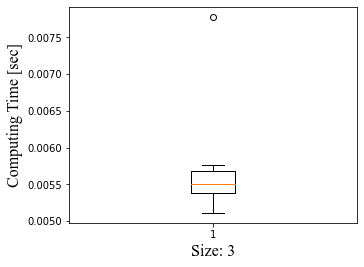

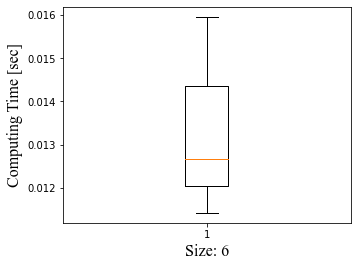

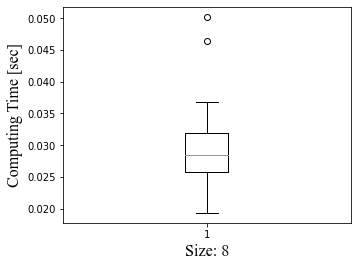

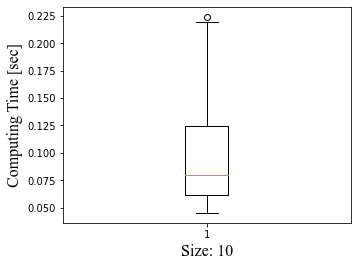

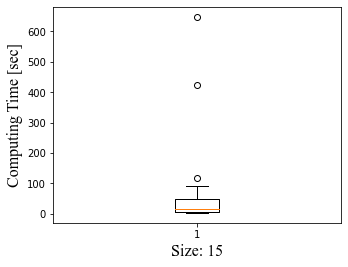

In [30]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
font = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        } 
font_2 = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'bold',
        'size': 15,
        }
def csv_to_data(path):
        # Creating dataset
        df=pd.read_csv(path).transpose()
        #print(df[0])
        return df[0][1:].values.astype(np.float64)
data_ref = np.random.normal(100, 10, 200)
data_1 = csv_to_data('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/exact_solver/output3.csv')
data_2 = csv_to_data('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/exact_solver/output6.csv')
data_3 = csv_to_data('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/exact_solver/output8.csv')
data_4 = csv_to_data('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/exact_solver/output10.csv')
data_5 = csv_to_data('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/exact_solver/output15.csv')
size=[3,6,8,10,15]

data = [data_1, data_2, data_3, data_4, data_5]

for datum,size_i in zip(data,size): 
        fig = plt.figure(figsize =(4, 3))
        
        # Creating axes instance
        ax = fig.add_axes([0, 0, 1, 1])
        
        # Creating plot
        bp = ax.boxplot(datum)
        plt.xlabel('Size: '+str(size_i), fontdict=font)
        plt.ylabel('Computing Time [sec]', fontdict=font)

        # show plot
        plt.title(f"Boxplot for Computing Time on Instance Size: {size_i}", fontdict=font_2)

        fig.savefig("out"+str(size_i)+".svg", bbox_inches="tight", pad_inches=0)
        #fig.savefig("test.svg", format="svg")
        plt.show()

/Users/felix/miniconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


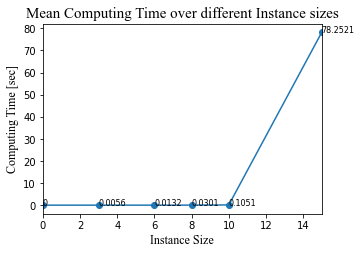

In [29]:
from scipy.optimize import curve_fit
def func(x, a, b, c, d):
    #return a*x**3 + b*x**2 +c*x + d
    return a * np.exp(b * x) 


"""
make the curve_fit
"""

font = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        } 

font_2 = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 15,
        } 
fig, ax = plt.subplots(figsize=(5,3.5))
mean=[]
size_2=[0]+size
mean.append(0)
for datum in data:
    mean.append(round(datum.mean(),4))
plt.scatter(size_2, mean)

z = np.polyfit((size_2), mean, 2)
#p = np.poly1d(z)
#p = scipy.optimize.curve_fit(lambda t,a,b: a+b*np.log(t),  size,  mean)
x = np.array(size_2, dtype=float) #transform your data in a numpy array of floats 
y = np.array(mean, dtype=float) #transform your data in a numpy array of floats 

popt, pcov = curve_fit(func, x, y,maxfev=10000)
plt.xlabel('Instance Size', fontdict=font)
plt.ylabel('Computing Time [sec]', fontdict=font)
for index in range(len(size_2)):
    ax.text(size_2[index], mean[index], mean[index], size=8)  
# giving a title to my graph
plt.title('Mean Computing Time over different Instance sizes', fontdict=font_2)
#plt.plot(size,p(size))
#plt.plot(p)

plt.plot(x, func(x, *popt), label="Fitted Curve") 
plt.xlim([0,15])
fig.savefig("different_instances"+".svg", bbox_inches="tight", pad_inches=0)


In [13]:
print(p)

(array([-60.78717546,  38.3090974 ]), array([[ 2701.94764155, -1261.48775433],
       [-1261.48775433,   631.97949067]]))


In [46]:
import pandas as pd
df=pd.read_csv('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/exact_solver/output3.csv').transpose()
#print(df[0])
test=df[0][1:].values
print(test.values)

['duration' '0.007779121398925781' '0.005765199661254883'
 '0.005216836929321289' '0.005474090576171875' '0.005631923675537109'
 '0.005768775939941406' '0.0054700374603271484' '0.005116939544677734'
 '0.005631923675537109' '0.005699872970581055' '0.005530118942260742'
 '0.005671977996826172' '0.005440711975097656' '0.00564885139465332'
 '0.00533294677734375' '0.005442142486572266' '0.005123138427734375'
 '0.005405902862548828' '0.0056989192962646484' '0.005110025405883789']
